In [2]:
!unzip '/content/MNIST-dataset.zip'


unzip:  cannot find or open /content/MNIST-dataset.zip, /content/MNIST-dataset.zip.zip or /content/MNIST-dataset.zip.ZIP.


**Importing Necessary Libraries**


In [3]:
import numpy #used for numerical analysis
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #Mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A layer consistes of a tensor-in tensor-out computation function
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense layer is the regular deeply connected
#Flatten-used for flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #Convolutional Layer
from keras.optimizers import Adam #optimizer
from keras.utils import np_utils #used for one-hot coding

**Load Data**

In [4]:
(x_train, y_train), (X_test, y_test)=mnist.load_data() #splitting the mnist data into train and test

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
print(x_train.shape)#shape is used for give the dimension values #60000-rows 28x28-pixels paint
(68000, 28, 28)
(10000, 28, 28)

(60000, 28, 28)


(10000, 28, 28)

**Understanding the data**

In [6]:
x_train[0] #printing the first image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0] #print the label of first image

5

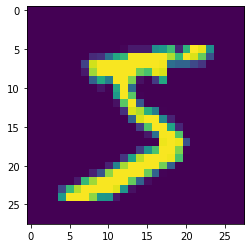

In [8]:
import matplotlib.pyplot as plt #used for data visualization 
plt.imshow(x_train[0])  #ploting the index=0 image


**Reshaping Dataset**

In [9]:

#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape(60000, 28, 28, 1).astype('float32') 
X_test= X_test.reshape(10000, 28, 28, 1).astype('float32')

**One-Hot Encoding**

In [10]:

#one hot encode
number_of_classes = 10 #storing the no. of classes in a variable
y_train= np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test= np_utils.to_categorical (y_test, number_of_classes)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**Creating the Model**

In [12]:

#create model
model=Sequential()
#adding model Layer
model.add(Conv2D (64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D (32, (3, 3), activation='relu'))
#model.add(Conv2D (32, (3, 3), activation="relu"))
#flatten the dimension of the image
model.add(Flatten())
#output Layer with 10 neurons
model.add(Dense(number_of_classes, activation='softmax'))

**Compiling the Model**

In [13]:
#compile model
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])


**Fitting the Model**

In [14]:
#fit the model
model.fit(x_train,y_train, validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 16s 4ms/step - loss: 0.2814 - accuracy: 0.9494 - val_loss: 0.1152 - val_accuracy: 0.9652
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0699 - accuracy: 0.9787 - val_loss: 0.0792 - val_accuracy: 0.9756
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0485 - accuracy: 0.9847 - val_loss: 0.0860 - val_accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0380 - accuracy: 0.9882 - val_loss: 0.0925 - val_accuracy: 0.9765
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.1087 - val_accuracy: 0.9755


**Observing the Metrics**

In [15]:
# final evaluation of the model
metrics = model.evaluate(X_test, y_test, verbose=0) 
print("Metrics(Test loss & Test Accuracy): ") 
print(metrics)


Metrics(Test loss & Test Accuracy): 
[0.10867995768785477, 0.9754999876022339]


**Predicting the Output**

In [16]:
prediction=model.predict(x_train[:4]) 
print(prediction)

1/1 [==============================] - 0s 117ms/step
[[1.12888485e-15 3.37551608e-15 5.93553912e-18 7.08732330e-07
  2.38198337e-17 9.99999285e-01 4.32525926e-17 2.57269436e-14
  6.93299654e-11 3.36722905e-14]
 [9.99999881e-01 8.03988480e-16 6.16333928e-11 6.36955697e-19
  1.01722053e-16 8.58316379e-16 1.16730924e-07 4.28190292e-18
  2.40993884e-13 9.96851581e-13]
 [3.26226217e-26 1.66845568e-14 3.50452492e-15 2.59891329e-15
  1.00000000e+00 1.30150742e-15 4.41740965e-23 4.11744450e-13
  8.81234579e-14 1.74567871e-09]
 [1.46905117e-15 9.99999881e-01 1.49221279e-07 4.94415164e-15
  8.95849436e-11 1.66757573e-16 1.89347337e-14 1.70059821e-13
  3.05183989e-09 2.93125512e-17]]


In [17]:
import numpy as np
print(np.argmax(prediction, axis=1)) #print our label from first 4 images
print(y_test[:4]) #printing the actual labels

[5 0 4 1]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**Saving the Model**

In [18]:
# save the model
model.save('mnistCNN.h5')


In [19]:
# saving in tar
!tar -zcvf mnistCNN.tgz mnistCNN.h5

mnistCNN.h5


**IBM Deployment**

In [20]:
!pip install watson-machine-learning-client


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 15.9 MB/s 
     |████████████████████████████████| 55 kB 4.4 MB/s 
     |████████████████████████████████| 132 kB 52.9 MB/s 
     |████████████████████████████████| 79 kB 8.5 MB/s 
     |████████████████████████████████| 9.9 MB 58.5 MB/s 
     |████████████████████████████████| 140 kB 72.0 MB/s 
     |████████████████████████████████| 956 kB 64.4 MB/s 
     |████████████████████████████████| 135 kB 68.8 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=26808b3f003ced70b0e8969bf4e5f53739121a35c6f63df07769f96301541e94
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=3a3a1e99e8

In [21]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 15.1 MB/s 
     |████████████████████████████████| 51 kB 817 kB/s 
     |████████████████████████████████| 824 kB 53.4 MB/s 
     |████████████████████████████████| 133 kB 65.1 MB/s 
     |████████████████████████████████| 547 kB 56.4 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=be03ecd5d283df1b6adbb0c5d0374d3ad5253f83c18a770bb8de8799bac8bc81
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=f10ffc7ad822b5feaea08adbc6fe77883e2e20c79cda757b9d21a84dd4e7af3a
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos

In [22]:
from ibm_watson_machine_learning import APIClient 
wml_credentials = {
 "url":"https://eu-gb.ml.cloud.ibm.com",
 "apikey":"Cd_XZAtXE84A1OAgYOhMAYFe496P2viFxEqRLHvt-uaj"
}
client=APIClient(wml_credentials) 

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [23]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:eu-gb:a/9486372b436d4f81b6f6810c9b23324b:f437aad0-ee9a-4b67-b77b-3f2365c35d1e::',
      'guid': 'f437aad0-ee9a-4b67-b77b-3f2365c35d1e',
      'name': 'Watson Machine Learning-h8',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'digitrecognition',
    'scope': {'bss_account_id': '9486372b436d4f81b6f6810c9b23324b'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'e2d65e94-47c2-4c40-87e4-837d87b2b20f',
      'bucket_region': 'eu-gb-standard',
      'credentials': {'admin': {'access_key_id': 'cdc503054dfb403d97da94b12e0ddedd',
        'api_key': 'I6YP8fn951HQDKAIBxD2BUPaAeeIdZAqzD4Z-DhVwnig',
        'secret_access_key': '55f023efb6cbb93dc2836b5b72ceb6b4b367b6add1c05065',
        'service_id': 'ServiceId-0fd9c411-35c7-4d53-aa32-b926c54fbea6'},
       'editor': {'access_key_id': 'ab51ff45b61a4c4585ff5c7ab389c4d8',
        '

In [24]:
def guid_sapce_name(client,digitrecognition):
  space = client.spaces.get_details()
  return(next(item for item in space['resources'] if item['entity']['name']==digitrecognition)['metadata']['id'])


In [25]:
space_uid = guid_sapce_name(client,'digitrecognition')
space_uid

'4ecdeb91-3d3e-4d86-baad-d1345f264945'

In [26]:
client.set.default_space(space_uid)

'SUCCESS'

In [27]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [28]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [29]:
model_details = client.repository.store_model(model='mnistCNN.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"HandWritten Digit",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [30]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-19T18:52:56.105Z',
  'id': '4bba0c49-1c19-4717-a8d0-cd785404d6fc',
  'modified_at': '2022-11-19T18:52:59.200Z',
  'name': 'HandWritten Digit',
  'owner': 'IBMid-666002L43C',
  'resource_key': 'ee98b456-a3b2-4a2d-8f34-6218584254a9',
  'space_id': '4ecdeb91-3d3e-4d86-baad-d1345f264945'},
 'system': {'warnings': []}}

In [31]:
model_id = client.repository.get_model_id(model_details)
model_id

'4bba0c49-1c19-4717-a8d0-cd785404d6fc'

In [32]:
client.repository.download(model_id, 'RECOGNITION_SYSTEM.tar.gb')


Successfully saved model content to file: 'RECOGNITION_SYSTEM.tar.gb'


'/content/RECOGNITION_SYSTEM.tar.gb'